# Assignment 3

In this assignment, you will perform fisheye calibration using opencv's fisheye calibration function, and generate a rectified image (i.e. where the barrel distortion in the image has been removed. An example of fisheye distortion correction is shown below:

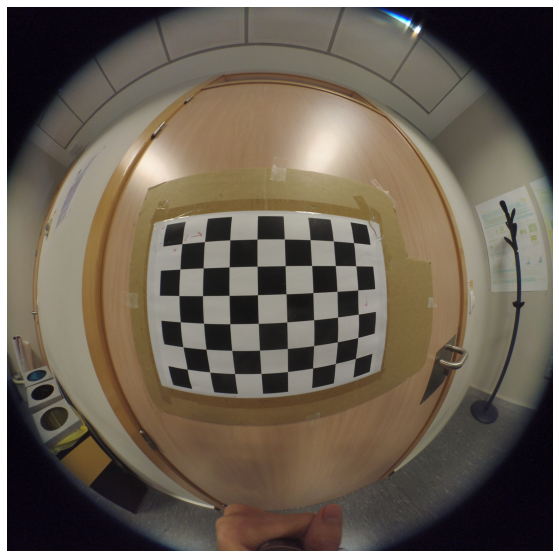
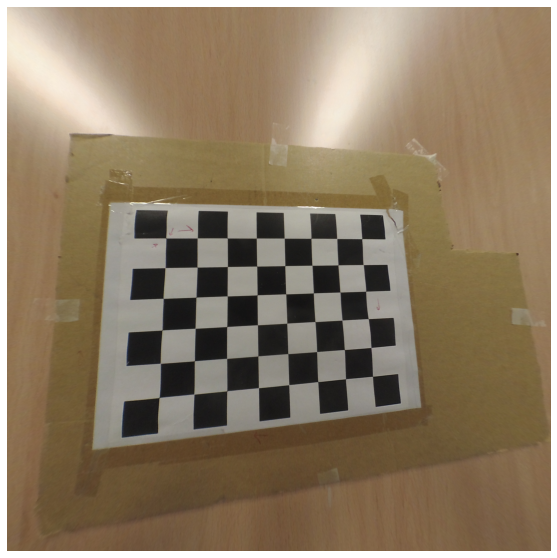


A folder of 26 fisheye calibration images is provided. 
For this particular dataset, the checkerboard pattern used is an 8*6 target, and the square size is 25mm

In addition to performing the calibration, you will also be required to calculate and visualize the reprojection error. The reprojection error is the distance between a pattern keypoint detected in a calibration image, and a corresponding world point projected into the same image. 

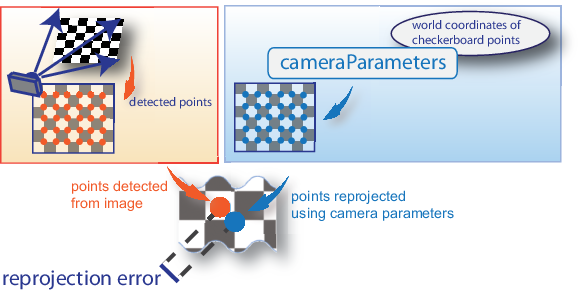

Finally, you will be asked to debug and improve the mean reprojection error, and suggest further improvements to improve calibration accuracy

## Submission Details
Assignment deadline: Midnight, Tuesday 28th Feb \
Jupyter Notebook containing submission to be submitted via blackboard \
Total grade: 10% of final module mark 


# Submission details:
#### Name: Smitesh Nit
#### ID:22223696
#### Class code: 1CSD

## Libraries required for this assignment

In [2]:
%matplotlib inline
# import required libraries
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

## Define calibration parameters
- Define checkerboard shape (rows and columns, defined by the inner corners of the target)
- define the target square size (25mm)
- define the subpix_criteria (note: check online documentation)
- define calibration_flags (again, check online documentation). Hint, don't set the "CALIB_CHECK_COND" flag
- define object points and image point variables

In [3]:
# Define the chess board rows and columns
CHECKERBOARD = (8,6)
SQUARE_SIZE = 25  # square size in mm
subpix_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
#calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_CHECK_COND + cv2.fisheye.CALIB_FIX_SKEW
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_FIX_SKEW
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)*SQUARE_SIZE

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# define number of images to be used
N_img = 26

## Perform the calibration

Note: there are plenty of online tutorials on this process, feel free to use as a reference. Just be aware that in this example, we will be using the cv2.fisheye.calibrate function - not all tutorials use this function

- Read in all of the calibration images using cv2.imread. Hint: create a list of images
- Convert images to greyscale
- Find the chessboard corners
- Use the cv2.fisheye.calibrate function to calibrate the camera

In [4]:
# load in all images into a list

images = glob.glob('images\*.jpg')
for fname in images:
    img = cv2.imread(fname)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
        imgpoints.append(corners)

# loop through images, and find the chessboard corners



# run fisheye calibration (cv2.fisheye.calibrate)
        
N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
rms, _, _, _, _ = \
    cv2.fisheye.calibrate(
        objpoints,
        imgpoints,
        gray.shape[::-1],
        K,
        D,
        rvecs,
        tvecs,
        calibration_flags,
        (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
    )
print("Found " + str(N_OK) + " valid images for calibration")
print("K=np.array(" + str(K.tolist()) + ")")
print("D=np.array(" + str(D.tolist()) + ")")



DIM=str(N_OK)
K=np.array(K.tolist())
D=np.array(D.tolist())


img = cv2.imread('images/cal1.jpg')
h, w = img.shape[:2]
newK, roi = cv2.getOptimalNewCameraMatrix(K, D, (w, h), 0)
# demo distortion correction (cv2.fisheye.initUndistortRectifyMap)
mapx, mapy = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), newK, (w, h), cv2.CV_16SC2)
undistorted_img = cv2.remap(img, mapx, mapy, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

# Display the original and undistorted images side by side
cv2.imshow('Original', img)
cv2.imshow('Undistorted', undistorted_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Found 26 valid images for calibration
K=np.array([[663.8317457725811, 0.0, 1486.3591152451743], [0.0, 664.3095315059475, 1498.2409032705436], [0.0, 0.0, 1.0]])
D=np.array([[0.14479242604314868], [-0.013929660277852005], [-0.0017568964737916574], [0.00035980024391613313]])


## Calculate reprojection error
Write a function that calculates the reprojection error
- the function should return both individual projection errors for each image and the average reprojection error for all images
- include a "debug" flag. If debug==True, then plot both the detected points and reprojected points for each image. This is a good way to visualize the accuracy of calibration. The result should look like the image below.

Review both the individual and mean projection errors for your results. It should become apprarant that in some of the images, calibration was not successful...

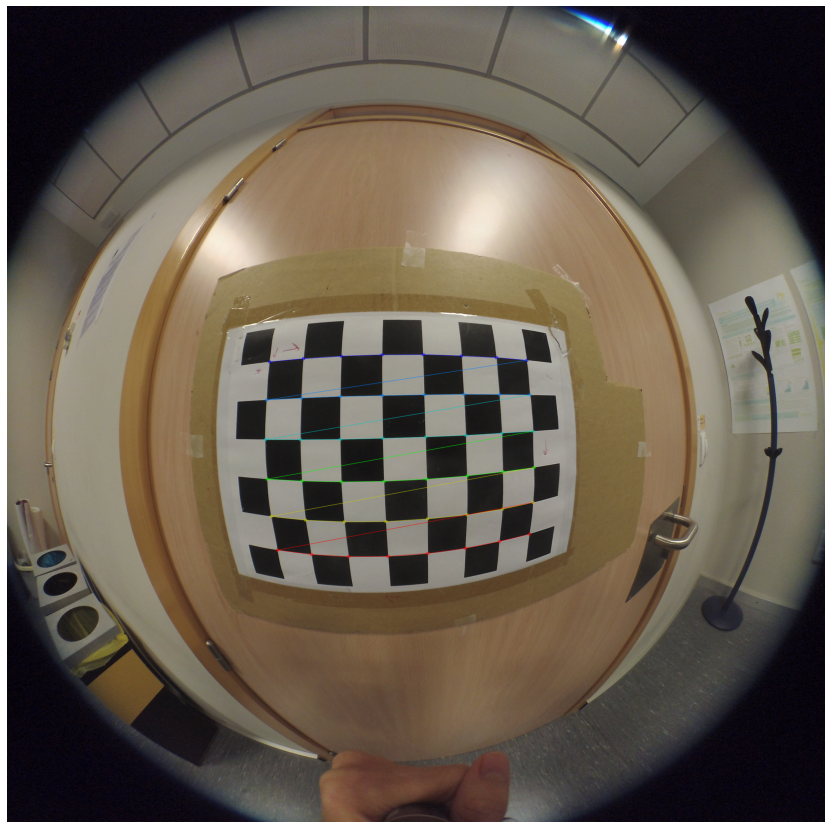

In [ ]:
def calculate_reprojection_error(objpoints, imgpoints, K, D, rvecs, tvecs,debug):
    # code goes here
    return errors, mean_error


In [ ]:
# Calculate the reprojection error for the calibration
# set debug flag

#calculate reprojection error by calling your calculate_reprojection_error function. 


## Debug performance
By now, you should have been able to identify a number of images where calibration didn't work:
- suggest possible reasons why calibration didn't work on these images
- Exclude these images from the calibration procedure, and assess the impact on reprojection error
